In [15]:
import matplotlib.pyplot as plt
import numpy as np
from TemporalNetwork import ContTempNetwork
import benchmark_methods

In [16]:
net_heat1 = ContTempNetwork.load('evolving_SBM_net_merges')

In [48]:
N = net_heat1.num_nodes

In [17]:
source_nodes = []
target_nodes = []
starting_times = []
ending_times = []


for i in range(0, 296, 5):
    matrix_snapshot = net_heat1.compute_static_adjacency_matrix(start_time=i, end_time=i+5).toarray()
    matrix_snapshot = (matrix_snapshot > 0).astype(int)
    source_nodes_snapshot = np.nonzero(matrix_snapshot)[0]
    target_nodes_snapshot = np.nonzero(matrix_snapshot)[1]
    starting_times_snapshot = [i] * len(source_nodes_snapshot)
    ending_times_snapshot = [i+5] * len(source_nodes_snapshot)

    source_nodes += list(source_nodes_snapshot)
    target_nodes += list(target_nodes_snapshot)
    starting_times += starting_times_snapshot
    ending_times += ending_times_snapshot

In [18]:
snapshot_network = ContTempNetwork(source_nodes=source_nodes,
                       target_nodes=target_nodes,
                       starting_times=starting_times,
                       ending_times=ending_times,
                       merge_overlapping_events=True)

PID  744825  :  merged  5408  events
PID  744825  :  merged  0  events


In [19]:
snapshot_network.times

Index([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205,
       210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275,
       280, 285, 290, 295, 300],
      dtype='int64', name='times')

In [20]:
snapshot_network.compute_laplacian_matrices(random_walk = False, save_adjacencies=True)

In [21]:
# for snap in snapshot_network.adjacencies:
#     plt.matshow(snap.toarray())

# Laplacian Spectrum Similarity

In [22]:
window_length = 6
n_eigen = 6

In [23]:
zsc, r = benchmark_methods.laplacian_spectrum_similarity(snapshot_network, window_length=window_length, n_eigen=n_eigen)

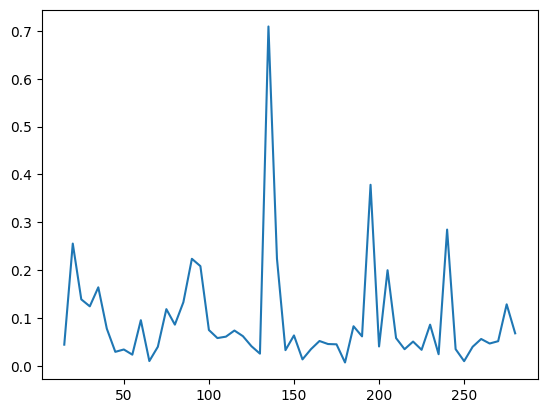

In [24]:
plt.plot(snapshot_network.times[window_length // 2 : len(snapshot_network.times) - window_length // 2 -1], zsc)

# NCPD

In [43]:
d_gamma, t_gamma = benchmark_methods.NCPD(snapshot_network.adjacencies, window_length=window_length, n_eigen=n_eigen)

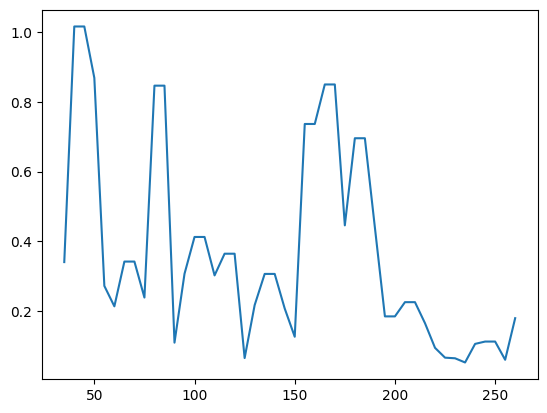

In [44]:
plt.plot(snapshot_network.times[t_gamma], d_gamma)

# CUMSUM

In [27]:
window_length = 6

In [39]:
Y, t_cumsum = benchmark_methods.CUMSUM(snapshot_network.adjacencies, window_length=window_length)

In [40]:
t

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47])

In [41]:
Y

[9.148773919278792,
 9.877975608684963,
 10.816830556106733,
 10.86903502294924,
 10.901116059253997,
 11.496287842009766,
 11.34574779207114,
 10.91014473820413,
 10.350399763028614,
 10.150458594396468,
 10.345288464938207,
 10.889090373241771,
 11.056672193747993,
 11.22693451425145,
 11.356798840791948,
 11.55173183110531,
 11.383925400841992,
 11.441442842714492]

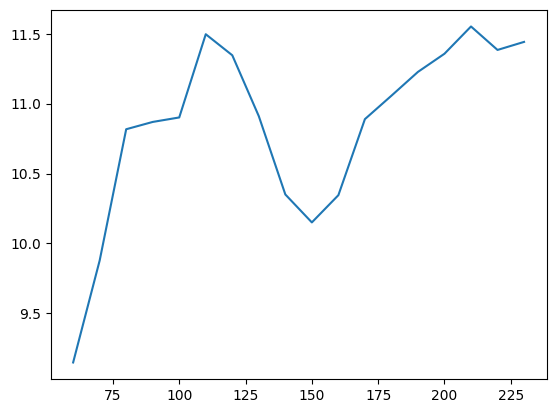

In [42]:
plt.plot(snapshot_network.times[t_cumsum], Y)

# CUMSUM 2

In [32]:
stat, t = benchmark_methods.CUMSUM_2(snapshot_network.adjacencies, window_length=2*window_length)

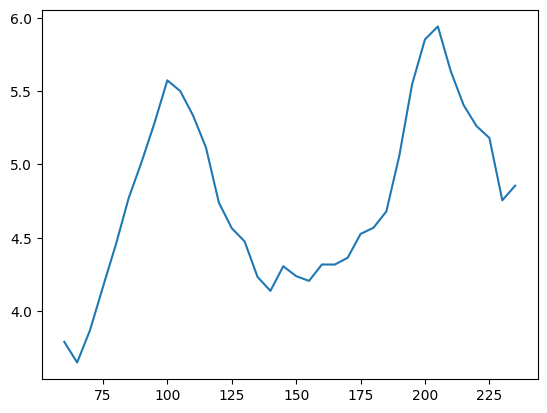

In [33]:
plt.plot(snapshot_network.times[t], stat)

# Average Frobenius Distance

In [34]:
frob_dist, t_frob = benchmark_methods.avg_frobenius_distance(snapshot_network.adjacencies, window_length=window_length)

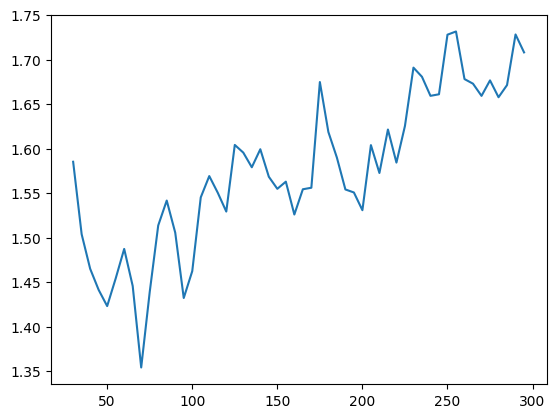

In [35]:
plt.plot(snapshot_network.times[t_frob], frob_dist)

# Avg Proctures Distance

In [36]:
proc_dist, t_proc = benchmark_methods.avg_procrustes_distance(snapshot_network.adjacencies, window_length=window_length)

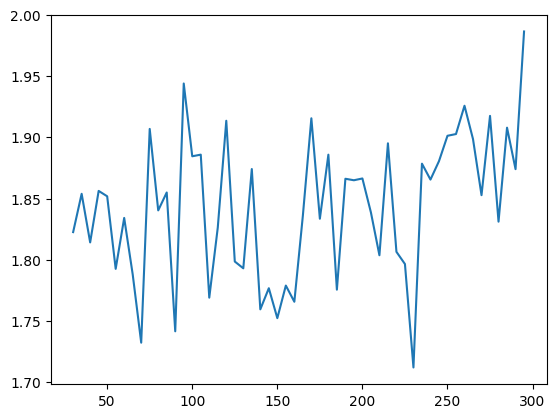

In [37]:
plt.plot(snapshot_network.times[t_proc], proc_dist)

### Comparison

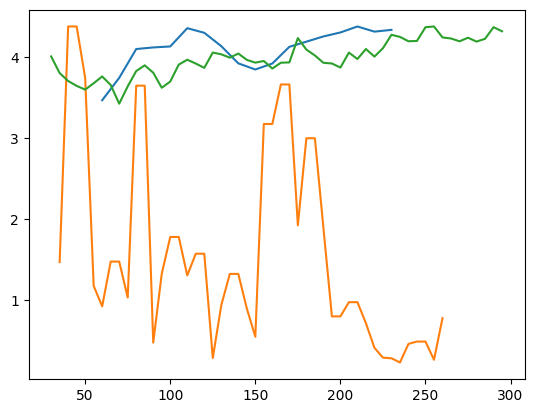

In [53]:
plt.plot(snapshot_network.times[t_cumsum] , Y / np.max(Y) * np.log(N))
plt.plot(snapshot_network.times[t_gamma] , d_gamma / np.max(d_gamma) * np.log(N))
plt.plot(snapshot_network.times[t_frob], frob_dist / np.max(frob_dist) * np.log(N))